# Predicting Home Prices in King County, WA 
## (Seattle Metropolitan Area and Points East)

#### <Jesse Markowitz's Working Notebook for Phase 2 Project>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_df = pd.read_csv('./data/kc_house_data.csv')

In [3]:
raw_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [109]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [13]:
raw_df.shape

(21597, 21)

In [24]:
raw_df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [25]:
raw_df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

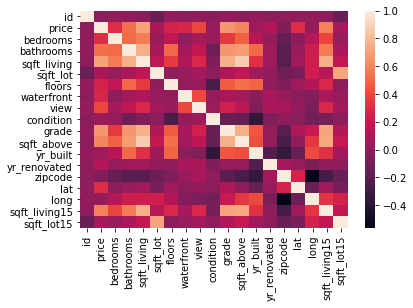

In [22]:
sns.heatmap(raw_df.corr());

## Stakeholder Priorities

Our stakeholders for this investigation are the homebuyers of King Country, WA. What do homebuyers care about?
 - LOCATION
 - sqft of living space, \# bedrooms/bathrooms
 - condition of the house
 - age of the house (historic vs new; historic vs old)
 - 

## Train-Test Split to create a df for EDA

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
y = raw_df['price']
X = raw_df.drop(labels=['price'], axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=5)

We create a df to use for EDA by re-combining the `X_train` and `y_train` data, then dropping the `['id']` column and resetting the index:

In [48]:
eda_df = pd.concat([pd.DataFrame(y_train), X_train], axis=1).drop('id', axis=1).reset_index(drop=True)

In [49]:
display(eda_df.head())
print(eda_df.shape)

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,405000.0,4/3/2015,4,2.50,2620,9359,2.0,0.0,0.0,3,9,2620,0.0,1987,0.0,98058,47.4380,-122.152,2580,7433
1,631750.0,8/18/2014,3,1.75,2360,4063,1.0,0.0,0.0,5,7,1180,1180.0,1940,0.0,98117,47.6902,-122.382,1660,4063
2,452500.0,10/9/2014,3,2.50,2240,7791,2.0,0.0,0.0,3,7,2240,0.0,2002,0.0,98065,47.5361,-121.880,2480,5018
3,4670000.0,6/17/2014,5,6.75,9640,13068,1.0,1.0,4.0,3,12,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
4,709000.0,2/24/2015,3,2.75,2780,7200,1.5,0.0,0.0,4,8,1870,910.0,1913,0.0,98118,47.5632,-122.270,1700,7200


(17277, 20)


In [50]:
eda_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.727700e+04,17277.000000,17277.000000,17277.000000,1.727700e+04,17277.000000,15356.000000,17232.000000,17277.000000,17277.000000,17277.000000,17277.000000,14195.000000,17277.000000,17277.000000,17277.000000,17277.000000,17277.000000
mean,5.403367e+05,3.374660,2.111333,2077.266192,1.503784e+04,1.491405,0.008075,0.237291,3.411646,7.654570,1784.938357,1970.874747,83.956252,98078.032818,47.559810,-122.214703,1987.588181,12637.828500
std,3.686163e+05,0.931114,0.766177,915.753595,4.099151e+04,0.540391,0.089500,0.771072,0.650234,1.167855,826.015132,29.354222,400.711193,53.478216,0.138647,0.140092,685.403769,25955.985544
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.240000e+05,3.000000,1.500000,1425.000000,5.026000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.470900,-122.329000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1974.000000,0.000000,98065.000000,47.571400,-122.231000,1840.000000,7620.000000
75%,6.412500e+05,4.000000,2.500000,2550.000000,1.071600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,1997.000000,0.000000,98118.000000,47.677500,-122.126000,2360.000000,10101.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,560617.000000


In [110]:
eda_df.isna().sum()

price               0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1921
view               45
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3082
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [119]:
eda_df.loc[eda_df['waterfront'].isna()]['zipcode'].value_counts()

98115    55
98103    53
98059    53
98052    53
98042    52
         ..
98005     9
98070     7
98024     5
98039     4
98148     4
Name: zipcode, Length: 70, dtype: int64

In [116]:
eda_df.loc[eda_df['zipcode']==98070]['price']

156      528000.0
280      585000.0
337      445000.0
642      649000.0
898      340000.0
           ...   
15508    750000.0
16546    390000.0
16569    385000.0
16887    430000.0
17259    256500.0
Name: price, Length: 97, dtype: float64

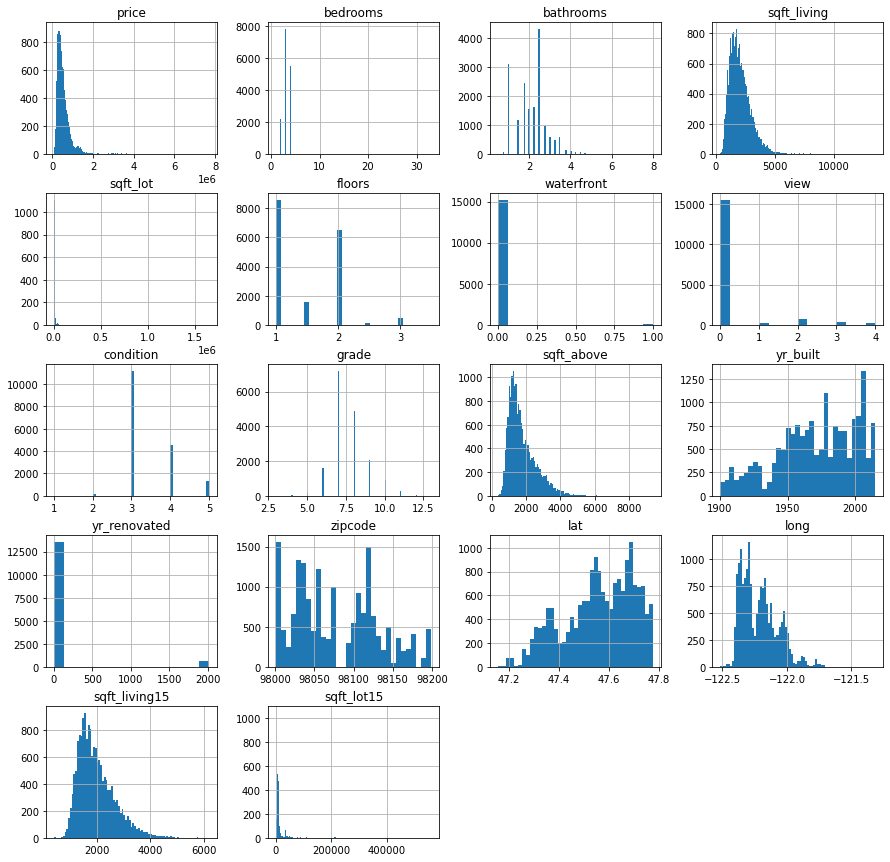

In [54]:
eda_df.hist(figsize=(15, 15), bins='auto');

**Notes on histograms and distributions:**
 - Price is right-skewed; outliers? Probably normal distribution w/out outliers
 - Bedrooms is skewed by extreme outlier (1 house has 33 bedrooms!)
 - sqft_basement has 350 '?' values; could turn into a binary {Basement:1, No basement:0} column
 - sqft_living right-skewed w/outliers
 - waterfront is 1 or 0
 - view is how many times it was viewed online? Or in-person visits (open-house)?
 - condition: maybe split into below avg (1,2), avg (3), above avg (4, 5)
 - grade: need to look up "King County grading system" to interpret; compare to condition? (https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b; scroll to "Building Grade) -- refers to building standards and meeting code

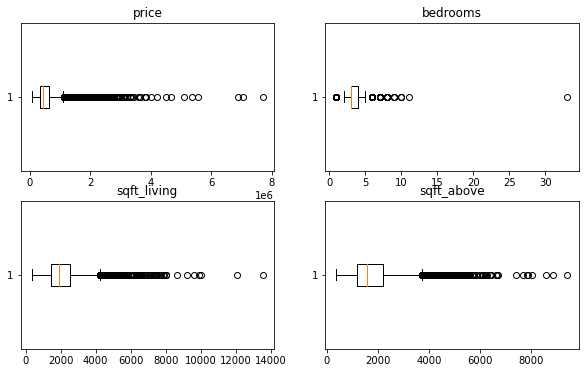

In [108]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
cols_to_plot = ['price', 'bedrooms', 'sqft_living', 'sqft_above']

for i, ax in enumerate(axs.flat):
    ax.set_title(cols_to_plot[i])
    ax.boxplot(eda_df[cols_to_plot[i]], vert=False)

fig.tight_layout;

**Other ideas:**
 - Split zip codes into Urban, Suburban, Rural; interaction w/size (Dillon)
 - Most basic model: simple linreg w/sqft_living (use as baseline model)
 - Interaction w/age and condition--is the house historic and well kept? Or is it old and run down?

In [65]:
eda_df.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
sqft_living      0.700923
grade            0.664625
sqft_above       0.604636
sqft_living15    0.585330
bathrooms        0.525356
view             0.392116
lat              0.307032
bedrooms         0.305913
waterfront       0.258042
floors           0.253709
yr_renovated     0.134954
sqft_lot         0.082496
sqft_lot15       0.079215
zipcode          0.057878
yr_built         0.050130
condition        0.037065
long             0.021214
Name: price, dtype: float64

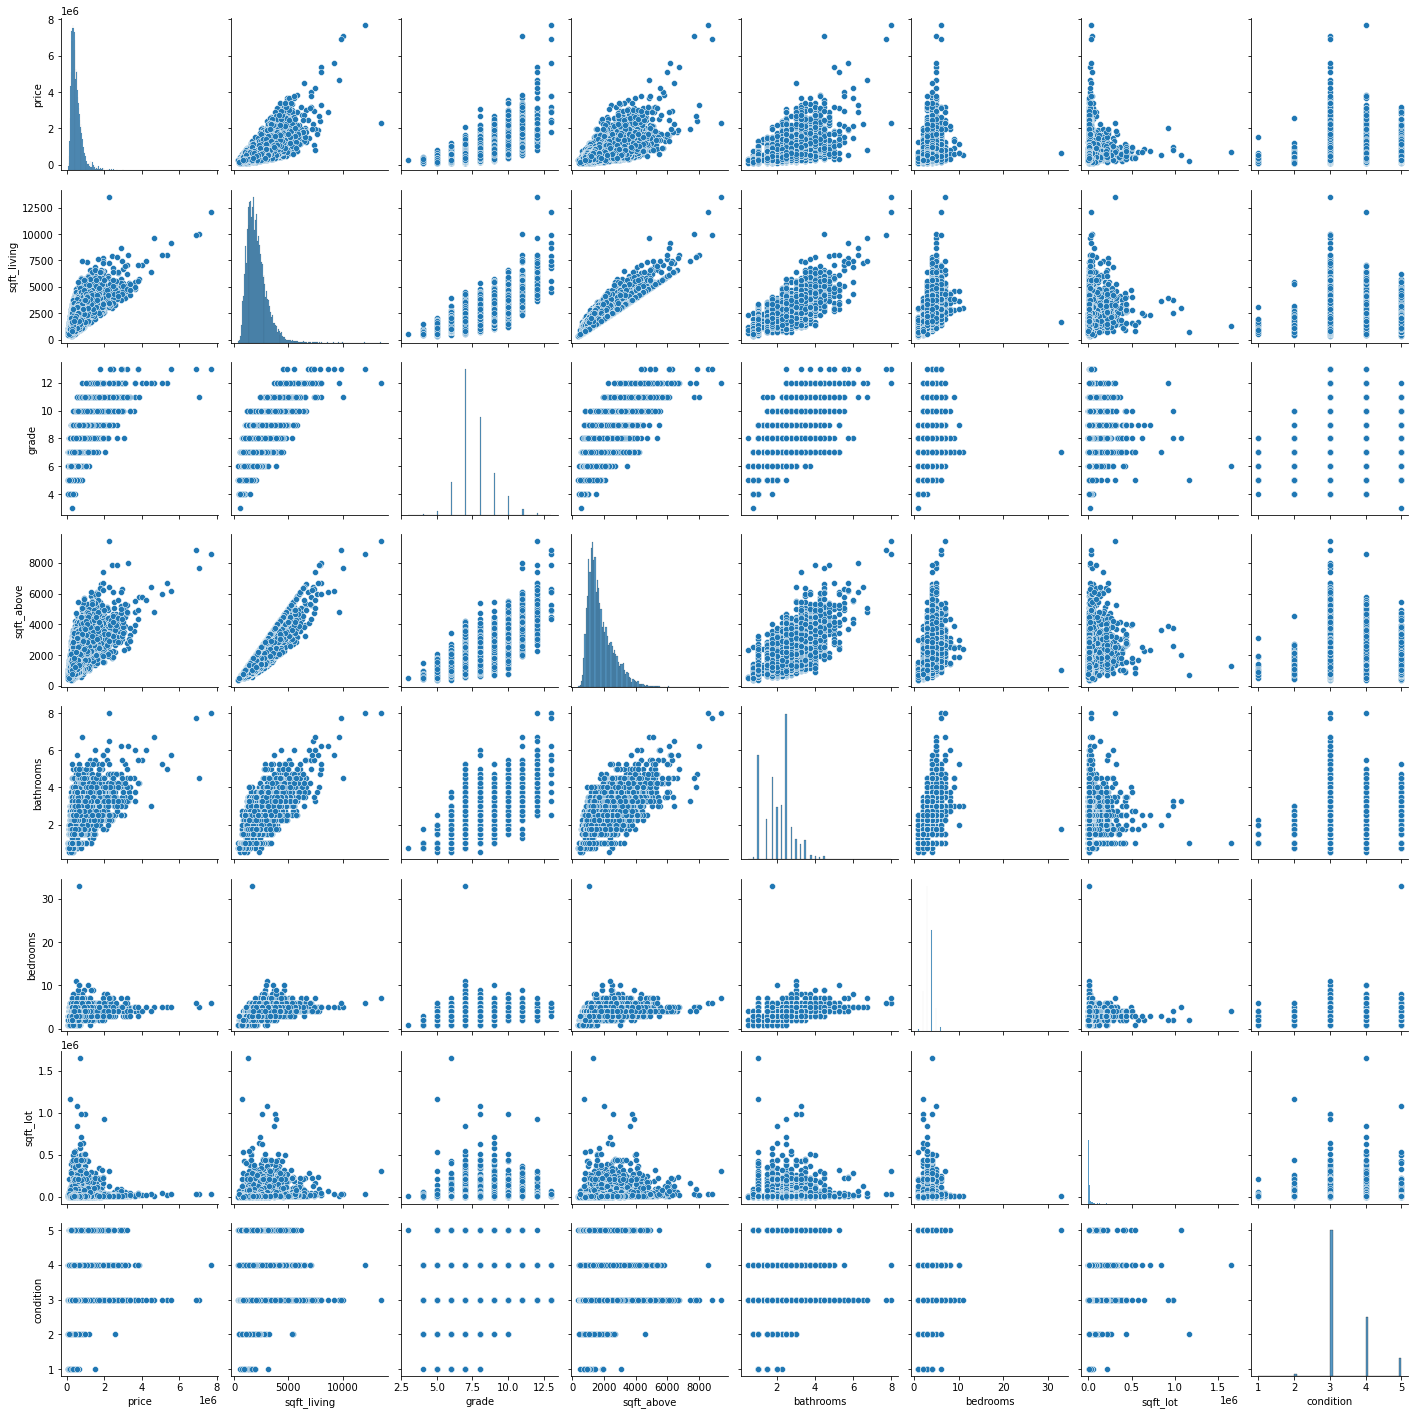

In [68]:
sns.pairplot(eda_df[['price', 'sqft_living', 'grade', 'sqft_above', 'bathrooms', 'bedrooms', 'sqft_lot', 'condition']]);

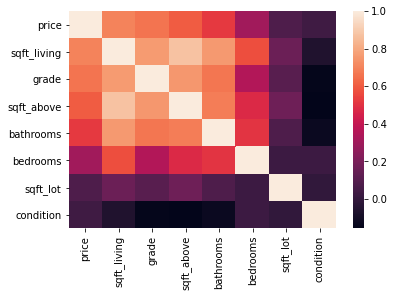

In [131]:
sns.heatmap(eda_df[['price', 'sqft_living', 'grade', 'sqft_above', 
                    'bathrooms', 'bedrooms', 'sqft_lot', 'condition']].corr());

## Baseline Model

Let's take a look at the simplest model: price and square footage of living space

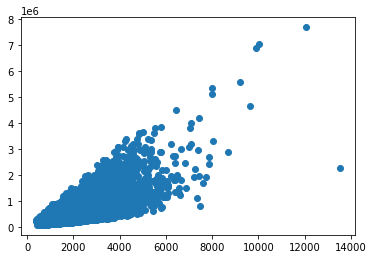

In [64]:
plt.scatter(x=eda_df.sqft_living, y=eda_df.price);

Definitely a positive correlation, but with heteroskedacity (right?)

In [77]:
import statsmodels.api as sm

In [80]:
model = sm.formula.ols(formula='price ~ sqft_living', data=eda_df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.668e+04
Date:                Mon, 23 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:31:07   Log-Likelihood:            -2.4012e+05
No. Observations:               17277   AIC:                         4.803e+05
Df Residuals:                   17275   BIC:                         4.803e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.574e+04   4958.793     -9.225      0.000   -5.55e+04    -3.6e+04
sqft_living   282.1408      2.184    129.165      0.000     277.859     286.422
==============================================================================
Omnibus:                    12090.176   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           474100.489
Skew:                           2.885   Prob(JB):                         0.00
Kurtosis:                      28.006   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The $R^2$ value is 0.941, which means that `sqft_living` explains just under half of the variation in `price`.

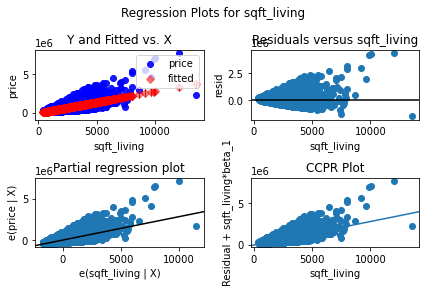

In [143]:
fig = sm.graphics.plot_regress_exog(model, "sqft_living")
fig.tight_layout(pad=1.0)

In [147]:
train_preds = model.predict(X_train)

In [150]:
train_preds.shape

(17277,)

In [149]:
sns.scatterplot(x=X_train, y=train_preds)

ValueError: Shape of passed values is (20, 2), indices imply (17277, 2)